# IBM Data Science Professional Certificate - Capstone Project

## 1. Introduction
### 1.1 Background
While a reduction in number has been observed over the last decades, car accidents are still counted in thousands in Switzerland in 2020. Because the direct and indirect consequences of such events (injuries, death, psychological damages, material damages, etc.) are sizeable, there is value in identifying what are the causes of the accidents so that adequate prevention measures can be put in place. Moreover, it would be valuable to society - not the least from a resource planning standpoint - to understand when accidents are most likely to occur, and respectively what outcome severity (light injuries, severe injuries, fatal outcome) can be expected depending on when and under what circumstances the accident took place. Since 1992, the Swiss Federal Statistics Office (OFS) is collecting data on car accidents country-wide and making such information available to the public. This analysis will leverage this data. 

### 1.2 Problem
The objective is to explore a year 2019 dataset from the Swiss Federal Statistics Office (OFS) and determine what are the **key factors** that drive the **outcome** of an accident for the involved car(s)' passengers: light injuries, severe injuries, fatal outcome. Additionally, the outcomes of this analysis can be used as a prescriptive tool to :
(1) Have the appropriate medical emergency resources allocated for the times, locations and circumstances when accidents are most likely to occur, with a particular emphasis on the severe and life-threatening cases. 
(2) Design prevention measures based on those accident factors identified as having the largest influence on accident outcomes. 

### 1.3 Interest
By being able to allocate medical emergency resources more efficiently and by being able to reduce injuries and deaths through prevention campaigns, society as a whole will **reduce the economic impact of road hazards**. This analysis is therefore **aimed at decision-makers of the Swiss Confederation, notably those in charge of Transportation and Medical Affairs**. Beyond economic considerations, there is also a moral value in **reducing the suffering and deaths** of the thousands of people affected by road accidents. 

## 2. Data Sources and Cleaning
### 2.1 Data Sources
The dataset used here is defined as "Road accidents where at least one of the parties was injured or worse". As a result, this dataset does not report on material damages or other consequences than bodily injuries. It is also worth noting that this dataset does not distinguish between what exact type of vehicle was involved, whether a car, bicycle, motorcycle, tractor, pedestrian, skater, etc. 
The dataset used in this analysis was obtained from the website of the Swiss Federal Statistics Office (OFS). A data browser allows the user to select the dimensions and time range of interest, within the limits of the Office's data structure. The used time range is the calendar year 2019. No other data source was used. 

**The variables in this dataset are :**  
Types of accidents : TYPE_ACCIDENT  
Type of road: TYPE_ROAD  
Severity of the accident: SEVERITY (the dependent variable)  
Month of the accident: MONTH  
Day of the week: DAY  
Time of the accident: TIME_ACCIDENT  
  
More details are provided below:  
  
**Types of accidents**  
SKID: The vehicle went into a skid/sideslid and/or the driver lost control of the car.  
OVERTAKE : While trying to overtake or changing lanes. This also includes the variable state where the accident happened when the vehicle was returning to its original lane.   
TURNING: While the vehicle was turning to change directions, ie. enter a new road.   
INTERSECTION: Accident taking place at a crossroad or junction of two roads with the two implied vehicles staying on their respective roads.   
BACK: The vehicle crashed into the back of another vehicle that was either mobile or immobile.  
PARKING: While getting in or out of a parking spot.   
ANIMAL: Accident created by an animal.   
FRONTAL: Frontal collisions. 
PEDESTRIANS: Accidents involving one or several pedestrians. 
OTHERACC: Other types not captured in the categories above.
  
**Time of the accident**  
NIGHT : Between midnight and 6am  
MORNING: Between 6am and noon  
AFTNOON: Between noon and 6pm  
EVENING: Between 6pm and midnight  

**Day of the week**
The days were grouped into two categories : Weekday (WEEKDAY) and Weekend (WEEKEND)

**Month**
For simplicity, the data has been grouped into seasons which are representative of average road conditions. 
WINTER: Dec-Feb #Icy roads
SPRING: Mar-May #Can be misty or rainy
SUMMER: Jun-Aug #Generally good road conditions
FALL: Sep-Nov #Slippery fallen leaves and rains
  
**Severity of the accident**  
LIGHT_INJURIES: Light injuries to at least one of the involved parties.   
SEVERE_INJURIES: Severe injuries to at least one of the involved parties.   
DEATH: Death of at least one of the involved parties.  
  
**Type of road** 
The following road types have been grouped in two buckets representative of their respective maximum speed. 
HWY: Highways, semi-highways and similars. The speed limit is typically 120 km/h, respectively 100 km/h for the semis.  
NONHWY: Main roads, secondary roads and other roads. The speed limit is typically 80 km/h or less.  

 
### 2.2 Data Cleaning
Data cleaning consisted first in the following basic steps :

(1) Translating the labels from French to English. This was performed in Excel directly on the CSV file. 

(2) Shortening the labels, for easier coding purposes. This was performed in Excel directly on the CSV file. 

(3) Transforming the non-numerical classifiers into dummy variables usable by the Machine Learning model discussed below. This was performed in the Jupyter Notebook. 

The data was extractable only in a form where each row represents a unique combination of explanatory variables (such as time, day of the week, type of road, etc.). There are then 10 columns corresponding to the years 2010-2019, where it is reported in each column how many accidents happened in the said year for the given set of explanatory variables of the row. 
Because a time-evolution is not the primary concern of this analysis, it was decided to :

(4) Focus the analysis on the year 2019 (as opposed to using the full dataset tracing back to 1992), as it is most likely more representative of the current road conditions and car technology. This dataset contains over 17'000 accidents, hence is a fairly significative dataset. This was performed in the Jupyter Notebook.

(5) Itemize into individual rows the rows where the number of occurences in superior to 1. (so that each row represents an individual accident).

(6) Group certain variable values into more general bins, as described in section 2.1. This was performed in Excel directly on the CSV file. 


### 2.3 Feature Selection
For this analysis, all features in the set were preserved, with the note that some values were grouped as explained just above. 


## 3. Methodology
### 3.1 Exploratory Data Analysis
The exploratory data analysis was conducted by analysing the leading causes of accidents.  
This was done using all the classifiers to be able to identify which are more prone to creating accidents.  
The results are presented in the Results section. 

### 3.2 Machine Learning Approach
This is a typical classification project, where instances have to be classified in 3 possible classes (death, severe injuries, light injuries) using certain classifiers. 
Because the classifiers and the target at hand are non-numerical, it was decided to use a decision tree. The independent variables had to be transformed into floats (dummy variables approach).
KNN was not selected because it requires numerical independent variables to make sense. 

### 3.3 Code for the ExploratoryAnalysis and ML Approach

In [15]:
# Importing modules

import numpy as np # Numpy
import pandas as pd # Pandas

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt




In [2]:
from sklearn.tree import DecisionTreeClassifier # Scikit Learn

In [3]:
!pip install --user pydotplus
!pip install graphviz


     |████████████████████████████████| 286kB 8.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [4]:
# Downloading the data in CSV format from a **raw** URL

import io
import requests
url="https://raw.githubusercontent.com/CGIBM/Coursera_Capstone/master/dataset_simplified.csv"
s=requests.get(url).content

# Placing the data in a Pandas dataframe
my_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
# Displaying the first 5 rows
my_data[0:5]
# Removing values from 1992 to 2018
my_data.drop(my_data.columns[[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]],axis=1,inplace=True)
# Eliminating the time dimension by summing across years
occu=my_data.iloc[:,6]
sumoccu=occu
my_data["OCCU"]=sumoccu
my_data.drop(my_data.columns[[6]],axis=1,inplace=True)

# Eliminating rows with zero occurences in 2019
my_data.drop(my_data[my_data.OCCU < 1].index, inplace=True)
newdata = pd.DataFrame(columns=my_data.columns)

# Itemizing the rows where occurence > 1
for x in range(my_data.shape[0]):
    occs=my_data.iloc[x,6]
    for n in range(occs):
        newdata=newdata.append(my_data.iloc[x,:], sort=False, ignore_index=True)


# Drop the column containing the number of occurences
newdata= newdata.drop(['OCCU'], axis=1)


In [37]:
# Declaring the Feature Matrix X and removing column 1 which is the Y dependent variable 
X = newdata[['TYPE_ACCIDENT', 'MONTH', 'DAY', 'TIME_ACCIDENT', 'TYPE_ROAD']].values 
X[0:5]


# Transforming non-numerical classifiers into dummy variables ##### CHECK IF REALLY NECESSARY ******************************
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['SKID','OVERTAKE','TURNING','INTERSECTION','PEDESTRIANS','BACK','PARKING','FRONTAL','ANIMAL',"OTHERACC"])
X[:,0] = le_type.transform(X[:,0]) 

le_month = preprocessing.LabelEncoder()
le_month.fit([ 'SPRING', 'SUMMER', 'FALL','WINTER'])
X[:,1] = le_month.transform(X[:,1])

le_day = preprocessing.LabelEncoder()
le_day.fit([ 'WEEKDAY', 'WEEKEND'])
X[:,2] = le_day.transform(X[:,2]) 

le_time = preprocessing.LabelEncoder()
le_time.fit([ 'NIGHT', 'MORNING','AFTNOON','EVENING'])
X[:,3] = le_time.transform(X[:,3]) 

le_road = preprocessing.LabelEncoder()
le_road.fit([ 'HWY', 'NONHWY'])
X[:,4] = le_road.transform(X[:,4]) 


X[0:5]

# Declaring the Y dependent variable vector
y = newdata["SEVERITY"]
y[0:5]

# Separation of the total dataset into a train and a test set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.25, random_state=3) # allowing a 25% partition to the test set

# Creation of the tree
fitTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

#Fitting of the tree on the training dataset
fitTree.fit(X_trainset,y_trainset)

# Running a prediction on the test dataset using the trained calibration
predTree = fitTree.predict(X_testset)

# Computing the accuracy of the tree on the test set
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7914884035127223


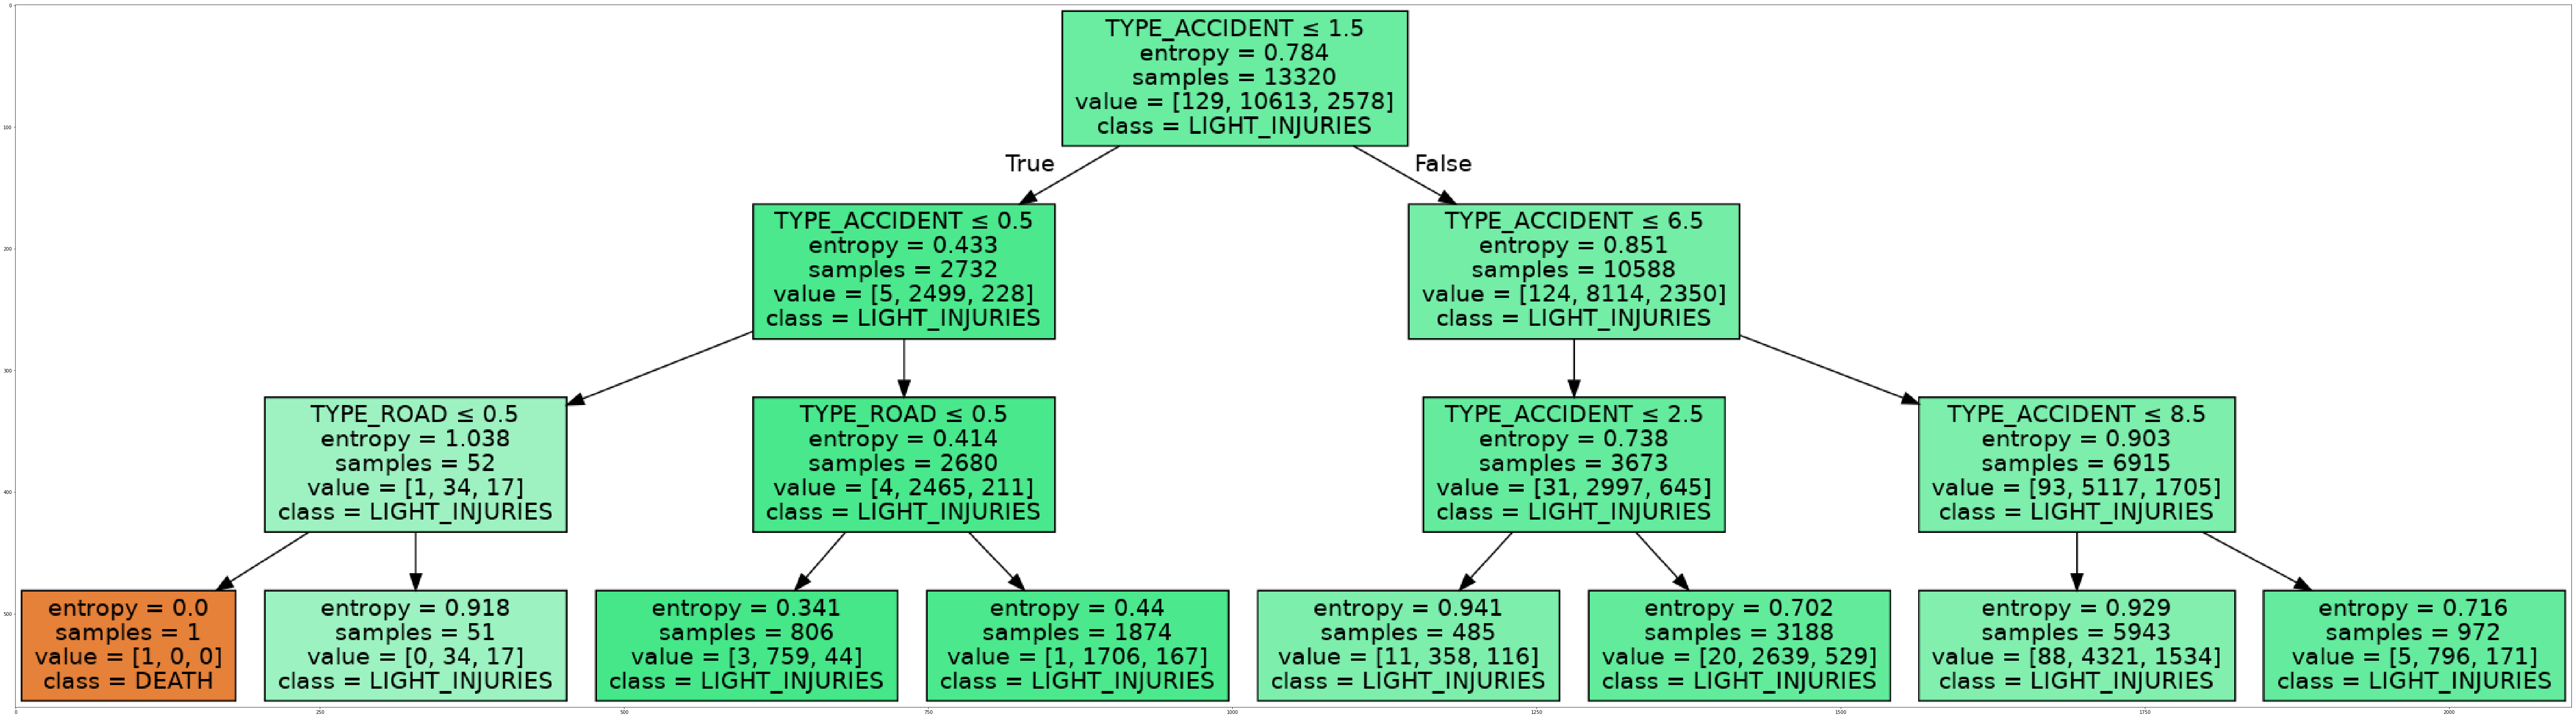

In [38]:
# Visualizing the tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "tree.png"
featureNames = newdata.columns[1:6]
targetNames = newdata["SEVERITY"].unique().tolist()
out=tree.export_graphviz(fitTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## 4. Results

### 4.1 Standard Modeling methods

For this section, please refer to the written report. 


### 4.2 Machine Learning modeling

Here we used a Decision Tree approach with dummied classifiers as all of them were non-numerical. 
At first sight, the tree gives a good 79% accuracy. However, looking closer at the data, one realizes that its performance is quite poor. The model is effectively only able to classify the data into "Light injury" buckets and the non-accuracy ends up corresponding to the ratio of severe injuries & deaths to the total of accidents. After trying with a Gini maximization, the results were exactly the same, at 79%. Changing the tree depth to 2, 4, 5 did not help either. From that standpoint, one can conclude that this ML model is not a success.  One can see particularly that dummying variables such as the accident type (skid, turning, takeover, etc.) does not work as these are strictly discrete categories. And from a conceptual standpoint, it appears normal that one cannot predict with a lot of precision the outcome of an accident with the classifiers at hand. One would therefore recommend discarding this ML analysis and focusing on the traditional results presented above. 


## 5. Discussion of the Results
At the end of this analysis, it appears clearly that not much can be done with simple Machine Learning techniques with the dataset as provided by the Swiss authorities. Indeed, the categorical classifiers complexify the analysis a lot and one would need more advanced techniques (not taught in this course) to be able to complete a more meaningful analysis.
Conversely, one can also notice that quite a few insights are already obtained from the traditional data analysis methods, and that there is limited interest in exploring a dataset of that type with an ML approach. 

## 6. Conclusion
In conclusion, the reader will have taken note that key factors. of accidents in Switzerland over the year 2019 have been as follows :  
...The summer is a critical period.  
...Accidents seem to overly take place in the late afternoon and evenings, possibly when people come back from work.  
...Skidding is still the number one factor of accidents, suggesting that people get distracted and/or that their judgement of road conditions and vehicle physics should be improved.  
...In the weekends, there is an over-proportionate number of skidding-generated accidents, suggesting that measures need to be taken in prevention or those, f.ex. in the areas of alcohol consumption and judgement alteration.  

Measures should therefore be implemented in priority against these factors. Additionnally, it would be commendable to organize the allocation of emergency medical resources and personal for those times identified as critical, such as for instance the summer, the weekdays and the afternoons. 

In [ ]:
# THE END